<a href="https://colab.research.google.com/github/i-m-invincible/Dog-vs-Cats/blob/main/cats_or_dogs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [4]:
!kaggle datasets download -d salader/dogs-vs-cats

Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
 99% 1.05G/1.06G [00:05<00:00, 166MB/s]
100% 1.06G/1.06G [00:05<00:00, 204MB/s]


In [5]:
!unzip dogs-vs-cats.zip -d dogs_vs_cats

Streaming output truncated to the last 5000 lines.
  inflating: dogs_vs_cats/train/dogs/dog.4419.jpg  
  inflating: dogs_vs_cats/train/dogs/dog.442.jpg  
  inflating: dogs_vs_cats/train/dogs/dog.4420.jpg  
  inflating: dogs_vs_cats/train/dogs/dog.4421.jpg  
  inflating: dogs_vs_cats/train/dogs/dog.4422.jpg  
  inflating: dogs_vs_cats/train/dogs/dog.4424.jpg  
  inflating: dogs_vs_cats/train/dogs/dog.4425.jpg  
  inflating: dogs_vs_cats/train/dogs/dog.4426.jpg  
  inflating: dogs_vs_cats/train/dogs/dog.4427.jpg  
  inflating: dogs_vs_cats/train/dogs/dog.4431.jpg  
  inflating: dogs_vs_cats/train/dogs/dog.4433.jpg  
  inflating: dogs_vs_cats/train/dogs/dog.4436.jpg  
  inflating: dogs_vs_cats/train/dogs/dog.4438.jpg  
  inflating: dogs_vs_cats/train/dogs/dog.4439.jpg  
  inflating: dogs_vs_cats/train/dogs/dog.444.jpg  
  inflating: dogs_vs_cats/train/dogs/dog.4440.jpg  
  inflating: dogs_vs_cats/train/dogs/dog.4441.jpg  
  inflating: dogs_vs_cats/train/dogs/dog.4442.jpg  
  inflating: do

In [6]:
!ls dogs_vs_cats

dogs_vs_cats  test  train


In [7]:
import tensorflow as tf

In [16]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten,BatchNormalization,Dropout

In [17]:
train_ds= keras.utils.image_dataset_from_directory(
    directory='/content/dogs_vs_cats/train',
    labels="inferred",
    label_mode="int",
    batch_size=32,
    image_size=(256, 256)
)
validation_ds= keras.utils.image_dataset_from_directory(
    directory='/content/dogs_vs_cats/test',
    labels="inferred",
    label_mode="int",
    batch_size=32,
    image_size=(256, 256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [10]:
def process(image, label):
    image = tf.cast(image / 255., tf.float32)
    return image, label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [18]:
model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3), padding='valid', activation='relu', input_shape=(256, 256, 3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid'))

model.add(Conv2D(64, kernel_size=(3, 3), padding='valid', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid'))

model.add(Conv2D(128, kernel_size=(3, 3), padding='valid', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid'))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [19]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 254, 254, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 125, 125, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 125, 125, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 60, 60, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 60, 60, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 30, 30, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 115200)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 128)            │    14,745,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,848,193 (56.64 MB)

 Trainable params: 14,847,745 (56.64 MB)

 Non-trainable params: 448 (1.75 KB)

In [21]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [23]:
history = model.fit(
    train_ds,
    epochs=9,
    validation_data=validation_ds
)

Epoch 1/9
625/625 ━━━━━━━━━━━━━━━━━━━━ 48s 76ms/step - accuracy: 0.9415 - loss: 0.1394 - val_accuracy: 0.8222 - val_loss: 0.5542
Epoch 2/9
625/625 ━━━━━━━━━━━━━━━━━━━━ 81s 75ms/step - accuracy: 0.9523 - loss: 0.1111 - val_accuracy: 0.7672 - val_loss: 0.7169
Epoch 3/9
625/625 ━━━━━━━━━━━━━━━━━━━━ 47s 75ms/step - accuracy: 0.9567 - loss: 0.1029 - val_accuracy: 0.8340 - val_loss: 0.4977
Epoch 4/9
625/625 ━━━━━━━━━━━━━━━━━━━━ 82s 76ms/step - accuracy: 0.9677 - loss: 0.0758 - val_accuracy: 0.8374 - val_loss: 0.6238
Epoch 5/9
625/625 ━━━━━━━━━━━━━━━━━━━━ 48s 76ms/step - accuracy: 0.9681 - loss: 0.0731 - val_accuracy: 0.8334 - val_loss: 0.5163
Epoch 6/9
625/625 ━━━━━━━━━━━━━━━━━━━━ 82s 77ms/step - accuracy: 0.9744 - loss: 0.0671 - val_accuracy: 0.8450 - val_loss: 0.7092
Epoch 7/9
625/625 ━━━━━━━━━━━━━━━━━━━━ 85s 82ms/step - accuracy: 0.9746 - loss: 0.0670 - val_accuracy: 0.8152 - val_loss: 0.5271
Epoch 8/9
625/625 ━━━━━━━━━━━━━━━━━━━━ 83s 84ms/step - accuracy: 0.9747 - loss: 0.0602 - val_accu

In [30]:
import cv2
import matplotlib.pyplot as plt

In [25]:
test_img=cv2.imread('/content/free-photo-of-indian-street-dog-lying-on-ground-in-patna.jpeg')

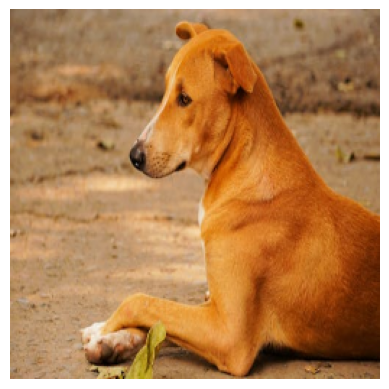

(<matplotlib.image.AxesImage at 0x7f5268b525d0>,
 (np.float64(-0.5), np.float64(255.5), np.float64(255.5), np.float64(-0.5)),
 None)

In [31]:
plt.imshow(cv2.cvtColor(test_img, cv2.COLOR_BGR2RGB)), plt.axis('off'), plt.show()

In [32]:
test_img.shape

(256, 256, 3)

In [33]:
test_img=cv2.resize(test_img,(256,256))

In [34]:
test_input=test_img.reshape(1,256,256,3)

In [35]:
model.predict(test_input)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


array([[0.93107986]], dtype=float32)